## Checking the EPOS old data set

In [1]:
import numpy as np
from scipy.stats import pearsonr
from simulated_dipole import *
import matplotlib.pyplot as plt
import pandas as pd

## IN CASE OF EPOS
mf = mass_fractions(model='EPOS')
es = energy_spectrum()
smd = SMD_method(model='EPOS')

d = file_loader('AixNet_EPOS_old')

dd = file_loader('AixNet_EPOS_test')
# print(d.keys())
print(dd['mass'])

['dnn_axis', 'dnn_core', 'dnn_energy', 'dnn_xmax', 'event_id', 'auger_id', 'sd_id', 'is_saturated', 'core', 'axis', 'energy', 'xmax', 'element', 'mass', 'merit', 'fd_energy', 'fd_axis', 'sd_energy', 'sd_axis', 'sd_galactic_latitude', 'sd_galactic_longitude', 'sd_core', 'univ_energy', 'univ_axis', 'delta_mean_delta', 'delta_xmax', 'delta_energy', 'muon_number']
51413
[ 1.  1.  1. ... 56. 56. 56.]


In [2]:
# plt.figure(figsize=(10,6))
# for name in names:
#     plt.figure(figsize=(10,6))
#     plt.title(name)
#     plt.scatter(d['dnn_xmax'][d['mass']==names[name]], d['mc_xmax'][d['mass']==names[name]], color=colors[name])
#     plt.show()


# for name in names:
#     plt.figure(figsize=(10,6))
#     plt.title(name)
#     plt.scatter(dd['dnn_xmax'][dd['mass']==names[name]], dd['xmax'][dd['mass']==names[name]], color=colors[name])
#     plt.show()

# print(len(d['dnn_xmax'][(d['mass']==16)&(d['dnn_xmax']>=1000)])/len(d['dnn_xmax'][(d['mass']==16)]))
# print(len(d['dnn_xmax'][(d['mass']==16)&(d['dnn_xmax']>=1000)]))

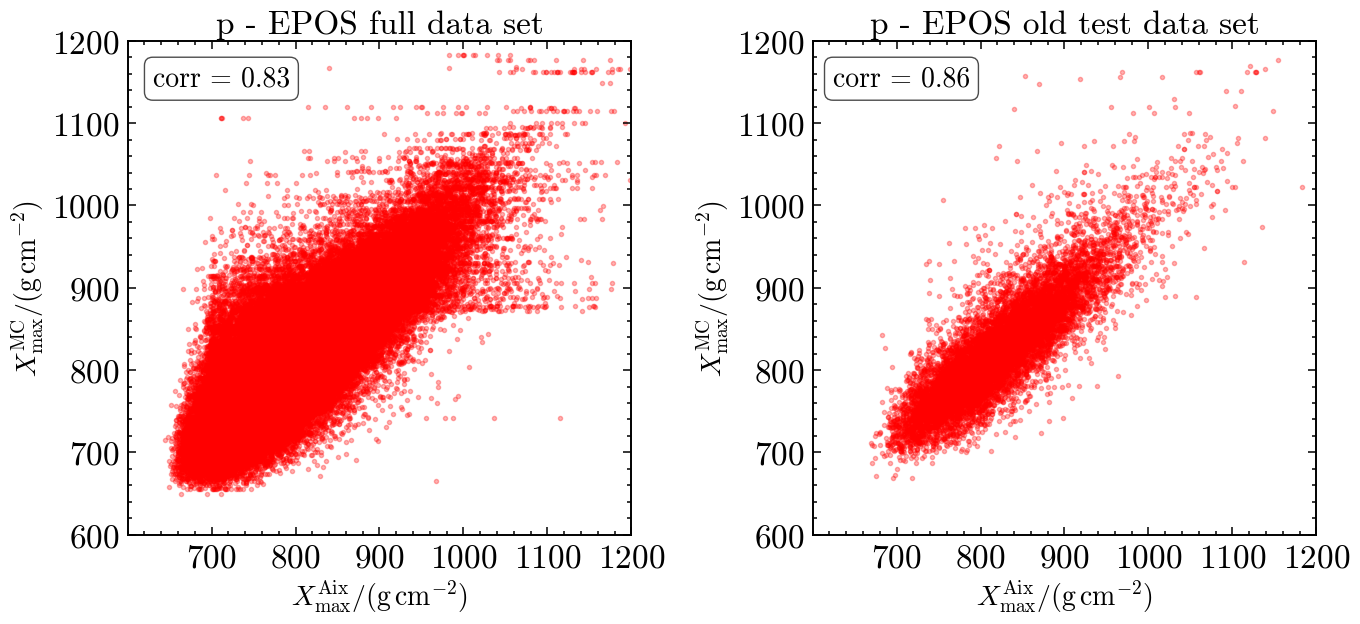

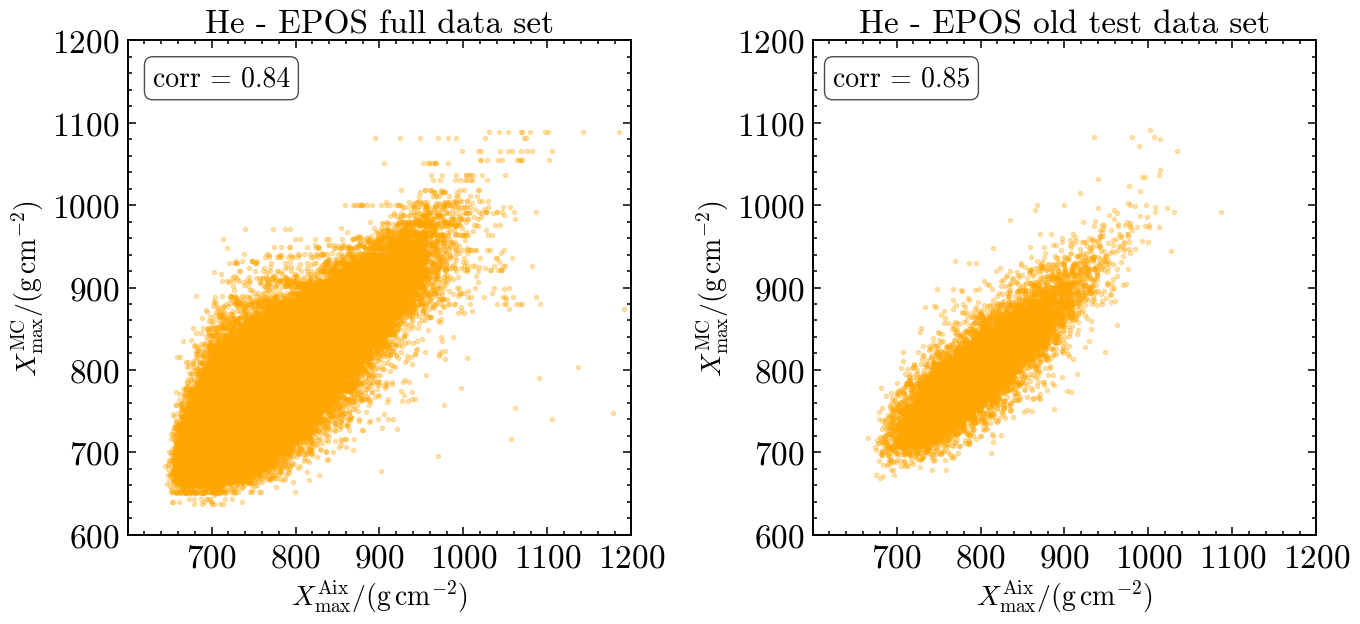

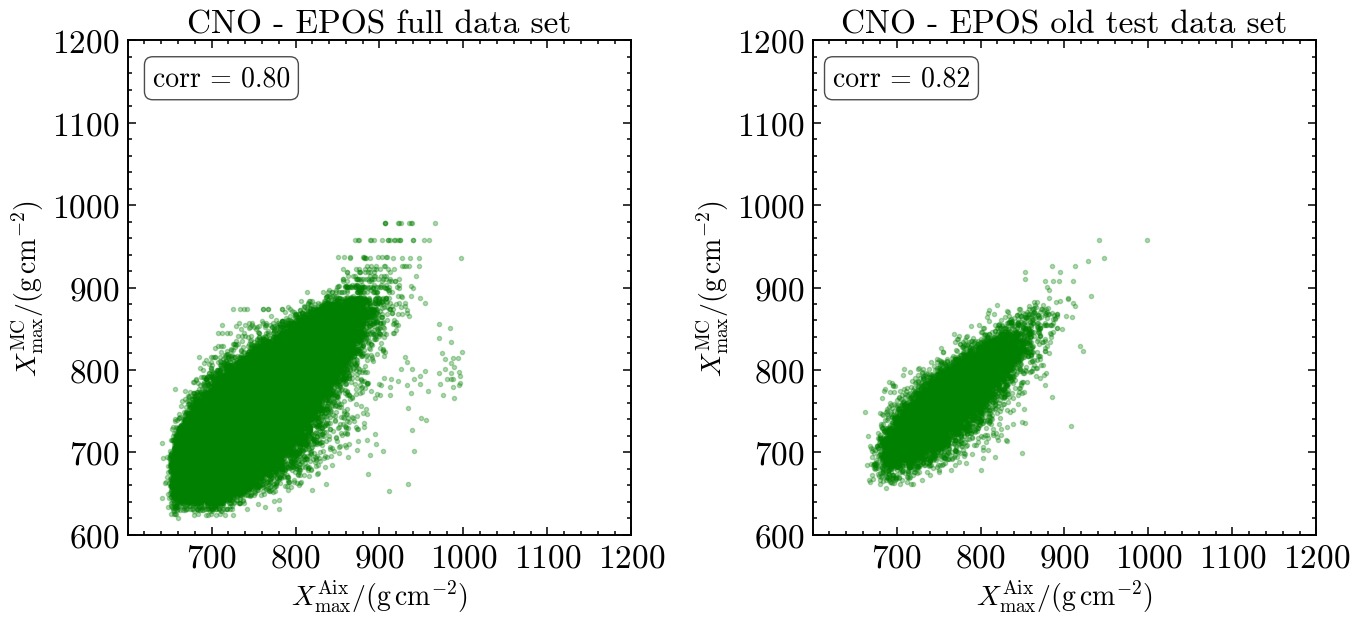

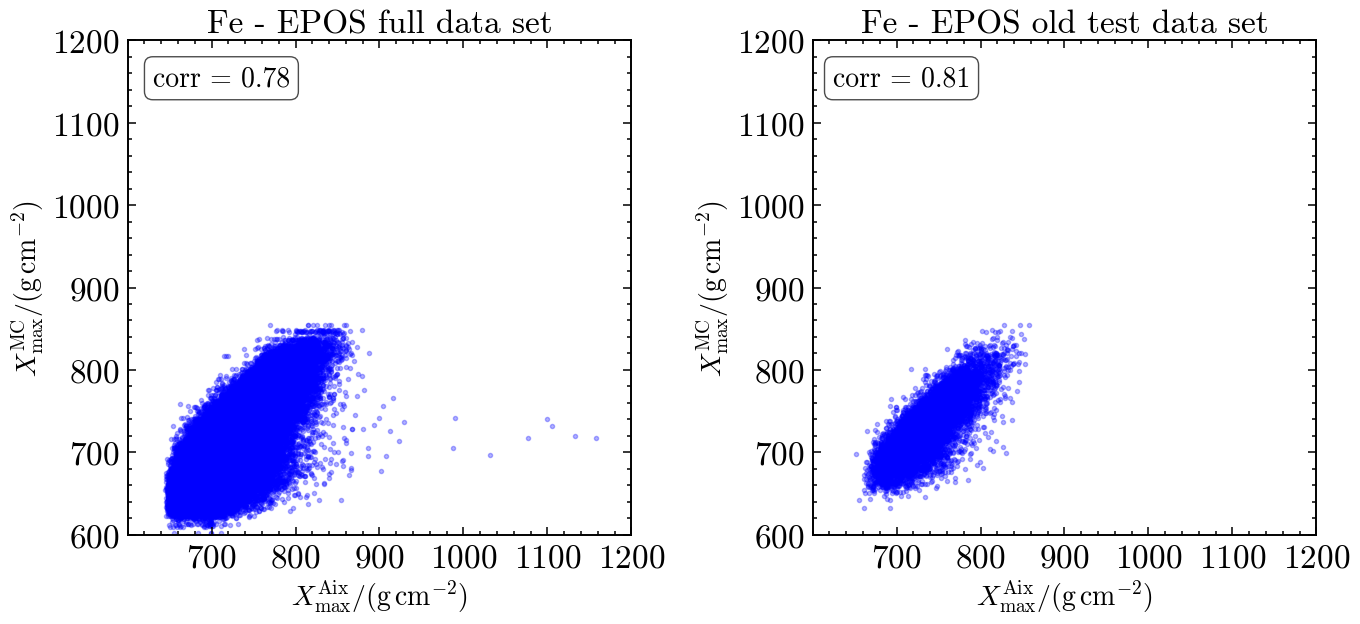

In [3]:
for name in names:
    fig, axs = plt.subplots(1, 2, figsize=(14, 7))  # 1 row, 2 columns

    axs[0].scatter(
        d['dnn_xmax'][d['mass'] == names[name]],
        d['mc_xmax'][d['mass'] == names[name]],
        color=colors[name], alpha=0.3
    )
    r1, _ = pearsonr(d['dnn_xmax'][d['mass'] == names[name]], d['mc_xmax'][d['mass'] == names[name]])
    axs[0].text(
        0.05, 0.95, f'corr = {r1:.2f}', transform=axs[0].transAxes,
        fontsize='medium', verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7)
    )
    axs[0].set_title(f'{name} - EPOS full data set')
    axs[0].set_xlabel(r'$X^\mathrm{Aix}_\mathrm{max} / \mathrm{(g \, cm^{-2})}$')
    axs[0].set_ylabel(r'$X^\mathrm{MC}_\mathrm{max} / \mathrm{(g \, cm^{-2})}$')
    xticks = np.arange(700, 1300, 100)
    axs[0].set_xlim(600, 1200)
    axs[0].set_xticks(xticks)
    axs[0].set_ylim(600, 1200)


    axs[1].scatter(
        dd['dnn_xmax'][dd['mass'] == names[name]],
        dd['xmax'][dd['mass'] == names[name]],
        color=colors[name], alpha=0.3
    )
    r1, _ = pearsonr(dd['dnn_xmax'][dd['mass'] == names[name]], dd['xmax'][dd['mass'] == names[name]])
    axs[1].text(
        1.40, 0.95, f'corr = {r1:.2f}', transform=axs[0].transAxes,
        fontsize='medium', verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.7)
    )
    axs[1].set_title(f'{name} - EPOS old test data set')
    axs[1].set_xlabel(r'$X^\mathrm{Aix}_\mathrm{max} / \mathrm{(g \, cm^{-2})}$')
    axs[1].set_ylabel(r'$X^\mathrm{MC}_\mathrm{max} / \mathrm{(g \, cm^{-2})}$')
    axs[1].set_xlim(600, 1200)
    axs[1].set_xticks(xticks)
    axs[1].set_ylim(600, 1200)

    #plt.suptitle(f'Comparison for {name}')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [4]:
print(len(d['dnn_xmax'][d['energy']>8]))
print(len(d['dnn_xmax'][(d['mass']==16)&(d['energy']>8)]))

459257
115033


In [5]:
459739/39000

11.788179487179487